# Guide to creating custom retail datasets

## Table of Contents

1. [Step 1. Foreground Images (bottles, boxes, etc)](#s1)
1. [Step 2: Background Images](#s2)
1. [Step 3: Add these images to the config](#s3)
1. [Step 4: Generating the dataset](#s4)

## <a name="s1"></a>Step 1.  Foreground Images (bottles, boxes, etc)

1. Download and save the image as **.png**. 
2. Follow any one of the methods on this page [page](https://www.colorexpertsbd.com/blog/remove-image-background-using-gimp) to remove the background and isolate the object alone. I prefer the **Fuzzy Selection Tool** method.
3. Once the background is removed, resize the canvas size to fit the image **as tight as possible**. Select **Image > Canvas Size** from the tool bar and input the appropriate height and width. Also click the **centre** button to ensure that the image is present at the centre of the canvas. Note down the **height and width** of the resized canvas.
4. Save the image as a png in the **img_templates** folder under a suitable category. (Use **File > Export As**).

The foreground object image should ideally look like this in GIMP after you are done with all the processing:

<img src="demo_imgs/final_fr_img.PNG" alt="drawing" width="400"/>



## <a name="s2"></a>Step 2: Background Images

1. While adding a new background image the most important point that you need to keep in mind is that data generation script expects a constant shelf height. 

**Ideal Background**:

<img src="demo_imgs/ideal_bg.jpg" alt="drawing" width="400"/>

** Non ideal**
<img src="demo_imgs/non_ideal_bg.jpg" alt="drawing" width="200"/>

For non ideal cases we may have to apply some perspective transformations to rectify the orientation. (In progress)

2. Once you have a background that satisfies the above criteria, open the image in GIMP (or any other image editing software) and note down the following properties, for each shelf.

    - The leftmost coordinates of the shelf (`x_start`, `y_start`)
    - The rightmost coordinates of the shelf (`x_end`, `y_end`)

For example:
<img src="demo_imgs/bg_measures.jpg" alt="drawing" width="600"/>
   

## <a name="s3"></a>Step 3: Add these images to the config.

1. Once you have a new foreground/ background image after completing the above steps, you need to add it to the collection.

### Adding Foreground Images
1. Copy the transparent .png created in **Step 1** to the appropriate folder inside **img_templates/foregrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the foreground image collection.


### Adding Background Images
1. Copy the background image created in **Step 2** to the appropriate folder inside **img_templates/backgrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the background image collection.

### Examples

In [38]:
import os
import json
import pprint

In [39]:
# importing the Template Manager module
from src.template_manager import TemplateManager

In [40]:
list(sorted(os.listdir("img_templates/backgrounds/")))

['blue_vector_shelf.jpg',
 'fridge_1.jpg',
 'fridge_2.jpg',
 'fridge_3.jpg',
 'fridge_3_1.jpg',
 'fridge_3_2.jpg',
 'fridge_3_3.jpg',
 'large_shelf_stock.jpg',
 'small_shelf_stock.jpg',
 'supermarket_shelf_0.jpg',
 'supermarket_shelf_1.jpg',
 'supermarket_shelf_2.jpg',
 'supermarket_shelf_3.jpg',
 'supermarket_shelf_4.jpg',
 'supermarket_shelf_5.jpg',
 'supermarket_shelf_6.jpg',
 'supermarket_shelf_7.jpg',
 'supermarket_shelves_vector.jpg',
 'wooden_shelf.jpg']

In [41]:
def get_config(config_type):
    if config_type == "bg":
        return json.load(open("config/backgrounds.json"))
    elif config_type == "fg":
        return json.load(open("config/foregrounds.json"))
    else:
        raise ValueError("config_type must be one of ['bg', 'fg'], got {}".format(config_type))

def pretty_print_config(config_type):
    pprint.pprint(get_config(config_type))

In [42]:
pprint.pprint(get_config("bg")["blue_vector_shelf"])

{'shelves': [{'x_end': 1180, 'x_start': 77, 'y_end': 403, 'y_start': 403},
             {'x_end': 1180, 'x_start': 77, 'y_end': 603, 'y_start': 603},
             {'x_end': 2055, 'x_start': 200, 'y_end': 1003, 'y_start': 1003},
             {'x_end': 2083, 'x_start': 1140, 'y_end': 1366, 'y_start': 1366}]}


#### Creating the manager instance

In [43]:
mgr = TemplateManager(config_path="config/")

#### Adding a Background Image configuration

In [44]:
# Using the values obtained during Step-2
background_args = {
    "shelves": [
      {
        "x_start": 125,
        "y_start": 135,
        "x_end": 1025,
        "y_end": 135
      },
      {
        "x_start": 125,
        "y_start": 207,
        "x_end": 1025,
        "y_end": 207
      }
    ]
}

# !!!! The label should be the same as the image name
# But for the sake of illustration (and reproducibility), it is given a temporary label
mgr.add_background_template(
    label="dummy_label",
    args=background_args
)

New background object dummy_label configured.


In [45]:
assert "dummy_label" in get_config("bg")

#### Deleting the image configuration

In [46]:
mgr.delete_background_template(label="dummy_label")

Background object dummy_label removed.


In [47]:
assert "dummy_label" not in get_config("bg")

#### Adding new foreground category

In [48]:
assert "bread" not in get_config("fg")

In [49]:
mgr.add_foreground_category(category="bread")

New foreground category bread added.


In [50]:
assert "bread" in get_config("fg")

#### Adding new foreground template.

In [51]:
assert "bread_16" not in get_config("fg")["bread"]

In [52]:
# Using the values obtained during Step-1
foreground_args = {
    "height": 600,
    "width": 180
}

# !!!! The label should be the same as the image name
# But for the sake of illustration (and reproducibility), it is given a temporary label
mgr.add_foreground_template(
    category="bread",
    label="bread_16",
    args=foreground_args
)

New foreground object bread_16 configured.


In [53]:
assert "bread_16" in get_config("fg")["bread"]

#### Deleting foreground image

In [54]:
mgr.delete_foreground_template(
    category="bread",
    label="bread_16"
)

Foreground object bread_16 removed.


In [55]:
assert "bread_16" not in get_config("fg")["bread"]

#### Deleting foreground category.

In [56]:
mgr.delete_foreground_category(category="bread")

Removed category bread and all associated objects.


In [57]:
assert "bread" not in get_config("fg")

## <a name="s4"></a>Step 4: Generating the dataset

### Without parallelism

In [58]:
import glob
import shutil

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# Importing the synthesizer module
from src.data_synthesizer import DataSynthesizer

In [60]:
print(DataSynthesizer.__doc__)

Synthetic Dataset creator for Mask RCNN

        Arguments
        ---------
        config_path: path-like, str
            The relative/absolute path to the configuration directory
            It is expected to contain three files:
                - backgrounds.json
                - foregrounds.json
                - class_map.json

        template_path: path-like, str
            The relative/absolute path to the template image directory
            It is expected to have the following directories
                - foregrounds
                - backgrounds
            The backgrounds directory itself must have directories named by
            categories.

        seed: int, default=None
            The seed used for the random number generation. This should be
            initialized in case replicable datasets are desired.

            NOTE: If the configuration files are modified, setting the seed will
                  NOT generate the same dataset, i.e. configuration changes
 

In [61]:
# Initializing the instance
config_path = "config/"       # where the backgrounds.json and foregrounds.json files are located
template_path = "img_templates/" # where the foreground and background templates are located

synthesizer = DataSynthesizer(config_path, template_path, seed=2020)

In [62]:
synthesizer.bg_labels

['large_shelf_stock',
 'small_shelf_stock',
 'blue_vector_shelf',
 'supermarket_shelf_0',
 'supermarket_shelf_1',
 'supermarket_shelf_2',
 'supermarket_shelf_3',
 'supermarket_shelf_4',
 'supermarket_shelf_5',
 'supermarket_shelf_6',
 'supermarket_shelf_7',
 'wooden_shelf',
 'fridge_3_1',
 'fridge_3_2',
 'fridge_3_3']

In [63]:
print(synthesizer.generate_synthetic_dataset.__doc__)

Synthesize an image dataset

            Arguments
            ---------
            n: int
                the number of images to be generated.

            output_dir: path-like, str
                The output directory to which the generated dataset is written.

            categories: list, default: ["bottles"]
                a list of categories from which objects will be selected. Should
                match the keys in the foreground config file.

            nomask_categories: list, default: []
                a list of categories from which objects will be selected,
                but no masks will be generated for them. This allows us to introduce
                controllable noise into the dataset.

            rotation_probability: float, default=0.1:
                The probability of rotating an image,
                in other words, the proportion of rotated objects

            max_x_offset: int, default=1
                The maximum number of pixels present between

In [64]:
output_dir = "data/"

# We use the following dimensions to display the images
r, c = 4, 4

# Generating the data
save_path = synthesizer.generate_synthetic_dataset(
    n = r*c,
    output_dir = output_dir,
    categories = ["bottles", "bags", "boxes"],
    nomask_categories = ["cans"],
    rotation_probability = 0,
    max_objs_in_pack = 2,
    max_x_offset = 10,
    skip_shelf_probability = 0.05,
    verbose = True
)

Generating image 1 of 16
Generating image 2 of 16
Generating image 3 of 16
Generating image 4 of 16
Generating image 5 of 16
Generating image 6 of 16
Generating image 7 of 16
Generating image 8 of 16
Generating image 9 of 16
Generating image 10 of 16
Generating image 11 of 16
Generating image 12 of 16
Generating image 13 of 16
Generating image 14 of 16
Generating image 15 of 16
Generating image 16 of 16
Done.


In [65]:
save_path

'data/synth_data_2019_03_08_22_25_18'

In [66]:
train_images = list(sorted(glob.glob(save_path + "/image*/train_image/*png")))
train_images[:5]

['data/synth_data_2019_03_08_22_25_18/image_0_2019_03_08_22_25_18/train_image/image_0_2019_03_08_22_25_18.png',
 'data/synth_data_2019_03_08_22_25_18/image_10_2019_03_08_22_25_18/train_image/image_10_2019_03_08_22_25_18.png',
 'data/synth_data_2019_03_08_22_25_18/image_11_2019_03_08_22_25_18/train_image/image_11_2019_03_08_22_25_18.png',
 'data/synth_data_2019_03_08_22_25_18/image_12_2019_03_08_22_25_18/train_image/image_12_2019_03_08_22_25_18.png',
 'data/synth_data_2019_03_08_22_25_18/image_13_2019_03_08_22_25_18/train_image/image_13_2019_03_08_22_25_18.png']

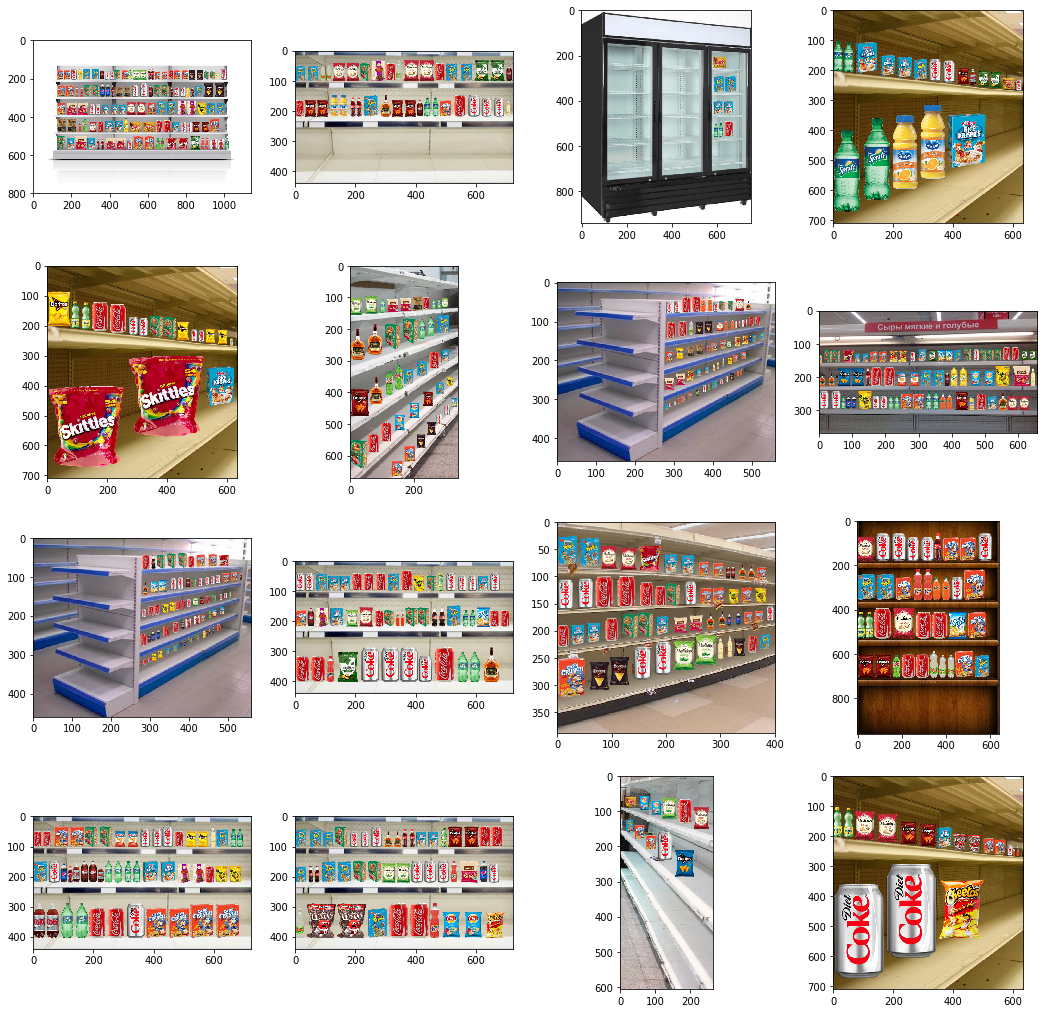

In [67]:
f, axes = plt.subplots(r, c, figsize=(18, 18))
axes = axes.ravel()
for i, image in enumerate(train_images):
    im = Image.open(image)
    axes[i].imshow(im)

In [68]:
# Cleanup generated data
shutil.rmtree(save_path)

### With parallelism

An important consideration in the design of the data synthesizer was to retain the ability to have reproducible datasets. With this in mind, we created a wrapper class that can be initialized with a seed, and is guaranteed to create the same dataset given the same `n`, `seed` and `n_jobs` combination (see documentation for caveats)

It should also be noted that the dataset generation process is mostly I/O intensive, and using `k` for `n_jobs` is unlikely to result in a k-fold improvement in time. However, using more than `2 * cpu_count` gives **~3x** speed up which is valuable in large dataset creation.

In [69]:
from src.data_synthesizer import ParallelDataSynthesizer

In [70]:
# Initializing the instance
config_path = "config/"       # where the backgrounds.json and foregrounds.json files are located
template_path = "img_templates/" # where the foreground and background templates are located

synthesizer = ParallelDataSynthesizer(config_path, template_path, seed=41, n_jobs=10)

In [71]:
output_dir = "data/"


n = 50

# Generating the data
# Note that this is now an async call, and returns before the entire dataset is generated
results = synthesizer.generate_synthetic_dataset(
    n = n,
    output_dir = output_dir,
    categories = ["bottles", "bags", "boxes"],
    nomask_categories = ["cans"],
    rotation_probability = 0,
    max_objs_in_pack = 2,
    max_x_offset = 10,
    verbose = False
)

There are two usages at this point.

1. Manually resolve each AsyncResult on your own, like so:
```
save_paths = [r.get() for r in results]
```
2. **[Recommended]** Use the `ParallelDataSynthesizer.merge` function:

In [72]:
merged_output_dir = "data/synth_data_merged"
save_path = ParallelDataSynthesizer.merge(results, output_dir=merged_output_dir)
save_path

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Destination path 'data/synth_data_merged/synth_data_2019_03_08_22_26_00/id_map.json' already exists. Continuing.
Encountered error Desti

'data/synth_data_merged/synth_data_2019_03_08_22_26_00'

The final directory contains n data points, and a single `id_map.json` file

In [73]:
assert len(os.listdir(save_path)) == n + 1

In [74]:
shutil.rmtree(merged_output_dir)